<a href="https://colab.research.google.com/github/mborkhat/DeepLearningExcercise/blob/master/Ex%203_D008_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [9]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


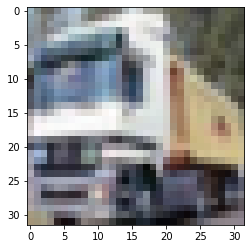

In [10]:
from matplotlib import pyplot
pyplot.imshow(X_train[1])
pyplot.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [13]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 1.5142 - accuracy: 0.4454 - val_loss: 1.2616 - val_accuracy: 0.5452
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.1369 - accuracy: 0.5957 - val_loss: 1.0901 - val_accuracy: 0.6114
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.9548 - accuracy: 0.6649 - val_loss: 0.9445 - val_accuracy: 0.6700
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.8361 - accuracy: 0.7058 - val_loss: 1.0071 - val_accuracy: 0.6567
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7552 - accuracy: 0.7340 - val_loss: 0.9221 - val_accuracy: 0.6821
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6789 - accuracy: 0.7615 - val_loss: 0.8384 - val_accuracy: 0.7080
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6030 - accuracy: 0.7885 - val_loss: 0.8248 - val_accuracy: 0.7187

313/313 - 1s - loss: 0.9271 - accuracy: 0.7119


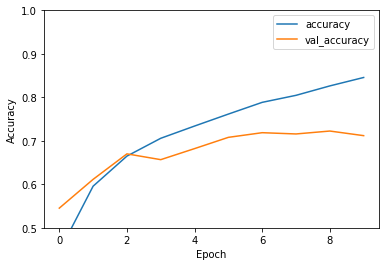

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)